<a href="https://colab.research.google.com/github/mayankjain281/One-function-for-all-Hypothesis-tests/blob/main/All_in_one_code_for_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One code for all Hypothesis testing

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
def Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation):
  try:
    if correlation==True:
      import matplotlib.pyplot as plt 
      import seaborn as sns
      import warnings
      warnings.filterwarnings('ignore')
      reg=sns.jointplot(*Samples,kind='reg')
      reg.fig.subplots_adjust(top=.9)
      reg.fig.suptitle('check outlier and distribution then regression')
      plt.show()
      print()
      from scipy.stats import pearsonr, spearmanr # numeric vs numeric
      print('Pearsonr test for linear relationship between variables')
      H0 = 'No liner correlation'
      print('null hypothesis: ',H0)
      corr_stat, p_val = pearsonr(*Samples)
      print("corr_stat is: ", corr_stat)
      print("p-value is: ", p_val)
      if p_val <= alpha:  
          print('We can reject the null hypothesis')  
          if corr_stat>0:
            print('positive correlation (corr_stat>0)')
          else:
            print('negative correlation (corr_stat<0)')
          if corr_stat>0.07:
            print('strong correlation (corr_stat>0.07)')
          else:
            print('weak correlations (corr_stat<0.07)')
      else:  
          print('We can accept the null hypothesis')
      print()
      print('Spearmanr test for monotonic relationship between variables')
      H0 = 'No rank-based correlation'
      print('null hypothesis: ',H0)
      corr_stat, p_val = spearmanr(*Samples)
      print("corr_stat is: ", corr_stat)
      print("p-value is: ", p_val)
      if p_val <= alpha:  
          print('We can reject the null hypothesis')  
          if corr_stat>0:
            print('positive correlation (corr_stat>0)')
          else:
            print('negative correlation (corr_stat<0)')
          if corr_stat>0.07:
            print('strong correlation (corr_stat>0.07)')
          else:
            print('weak correlation (corr_stat<0.07)')
      else:  
          print('We can accept the null hypothesis')
    
    else:
      if alternative=='two-sided':
        H0 = 'means are equal'       
      elif alternative== 'less':
          H0 = 'Sample1>=Sample2'
      elif alternative=='greater':
        H0 = 'Sample1<=Sample2'
      else:
        print('Check the alternative input')
        exit()
      H0_chi_stat = 'observed counts are same as expected, proportions are similar'
      H0_chi2_contingency = 'variables are independet, liklihoods are similar'
      if not all(Samples):
        print('Check Samples detail input')
        exit()

      if type(Samples[0][0])==list:
        if sum(Samples[0][0])-sum(Samples[0][1])<0.001:
          print('Chi square test for goodness of fit [[observed],[expected]]')
          print('null hypothesis: ',H0_chi_stat)
          from scipy.stats import chisquare  
          test, p_val = chisquare(*Sample1)  
          print("p-value is: " + str(p_val)) 
          if p_val <= alpha:  
              print('We can reject the null hypothesis')  
          else:  
              print('We can accept the null hypothesis')
            
        else:
          print('Chi square test for indepedence (crosstab contingency)')
          print('null hypothesis: ',H0_chi2_contingency)
          from scipy.stats import chi2_contingency  
          test, p_val, dof, expected_val = chi2_contingency(Samples)  
          print("p-value is: " + str(p_val))
          if p_val <= alpha:  
              print('We can reject the null hypothesis')  
          else:  
              print('We can accept the null hypothesis')

        
      elif len(Samples)>2:
        print(len(Samples), 'Sample','Anova f test')
        print('null hypothesis: ',H0)
        from scipy.stats import f_oneway  
        f_test, p_val = f_oneway(*Samples)  
        print("p-value is: " + str(p_val))
        if p_val < alpha:      
            print("We can reject the null hypothesis")  
        else:  
            print("We can accept the null hypothesis")  
        
      elif len(Samples)>1:
        from scipy.stats import levene 
        statistic, p_val = levene(*Samples)
        if p_val <0.05:
          print(len(Samples), 'Sample',"Welch's t-test for unequal variances")
          print('null hypothesis: ',H0)
          from scipy.stats import ttest_ind 
          t_test,p_val = ttest_ind(*Samples,equal_var = False, alternative=alternative)
          print("p-value is: ", p_val)
          if p_val < alpha:      
              print("We can reject the null hypothesis")  
          else:  
              print("We can accept the null hypothesis") 
        
        else:
          print(len(Samples), 'Sample','Independent t-test')
          print('null hypothesis: ',H0)
          from scipy.stats import ttest_ind 
          t_test,p_val = ttest_ind(*Samples, alternative=alternative)
          print("p-value is: ", p_val)
          if p_val < alpha:      
              print("We can reject the null hypothesis")  
          else:  
              print("We can accept the null hypothesis") 

        if len(Samples[0])==len(Samples[1]):
          print(len(Samples), 'Sample','Paried t-test')
          print('null hypothesis: ',H0)
          from scipy.stats import ttest_rel
          t_test, p_val = ttest_rel(*Samples, alternative=alternative)  
          print("p-value is: ", p_val)
          if p_val < 0.05:  
              print("We can reject the null hypothesis")  
          else:  
              print("We can accept the null hypothesis") 
        
      elif len(Samples)==1:
        print(len(Samples), 'Sample','t test')
        print('null hypothesis: ',H0)
        from scipy.stats import ttest_1samp			
        t_stat, p_val = ttest_1samp(Samples[0],mu, alternative=alternative)	
        print("p-value is: ", p_val)
        if p_val < 0.05:      
            print(" We can reject the null hypothesis")  
        else:  
            print("We can accept the null hypothesis") 
        print()
        print('mean of population:',[round(mu,2)])

      print()

      # Visual analysis
      import matplotlib.pyplot as plt
      import seaborn as sns
      import pandas as pd
      if type(crosstab)==pd.core.frame.DataFrame:
        crosstab.plot(kind="bar",figsize=(8,5))
        print(crosstab)
      elif type(Samples[0][0])==list:
        import numpy as np
        plt.figure(figsize=(8,5))
        barWidth = 0.25
        br1 = np.arange(len(Samples[0][0]))
        br2 = [x + barWidth for x in br1]
        plt.bar(br1, Samples[0][0], color ='r', width = barWidth, label ='observed')
        plt.bar(br2, Samples[0][1], color ='g', width = barWidth, label ='expected')
        plt.legend()
        plt.show()

      else:
        import numpy as np
        print(f'mean of Samples:',[np.mean(Samples[i]).round(2) for i in range(len(Samples))])
        print(f'variance of Samples:',[np.var(Samples[i]).round(2) for i in range(len(Samples))])
        print()
        import numpy as np
        for i in range (len(Samples)): 
          sns.kdeplot(Samples[i],fill=True,label=f'Sample{i}')
        plt.legend()
        plt.title('check distribution')
        plt.show()
        
        labels = [('Sample'+str(i+1)) for i in range (len(Samples))]
        plt.boxplot(Samples, vert=False, patch_artist=True,labels=labels) 
        plt.title('check outliers')
        plt.show()

      print()
      if len(Samples)>1:
        # Assumption 1: Normality of distribution
        ass=''
        if len(max(Samples,key=len))<50:
          from scipy.stats import shapiro
          for Sample in (Samples):
            sh, p_val = shapiro(Sample)
            print('Shapiro test for normality, p_val=',p_val)
            if p_val <0.05:
              ass='Samples are not normally distributed, preform non parametric test.'
              print(ass)
              break
        else:
          from scipy.stats import kstest
          for Sample in (Samples):
            ks, p_val = kstest(Sample, "norm")
            print('KS test for normality, p_val=',p_val)
            if p_val <0.05:
              ass='Samples are not normally distributed, preform non parametric test.'
              print(ass)
              #'If possible- remove outliers or use log transpose, use clt
              break
        # Assumption 2: Homogeneity of Variance
        from scipy.stats import levene 
        statistic, p_val = levene(*Samples)
        print('Levene test for homogeneity, p_val=',p_val)
        if p_val <0.05:
          ass='Samples have unequal variance, preform non parametric test.'
          print(ass)
        import numpy as np
        min = np.min([(np.var(Sample)) for Sample in (Samples)])
        ratio = (([round(np.var(Sample)/min) for Sample in (Samples)]))
        print('Ratio of variance :' , ratio,', not much difference in variances.' if not any(map(lambda x: x > 4, ratio)) else ', high difference in variances.','\n')

      # Non Parametric tests
      if ((type(Samples[0][0])!=list)&(len(Samples)>1)):
        if ass:
          if len(Samples)>2:
            print(len(Samples), 'Sample','Kruskal-Wallis test')
            print('null hypothesis: ',H0)
            from scipy.stats import kruskal  
            f_test, p_val = kruskal(*Samples)  
            print("p-value is: " + str(p_val))
            if p_val < alpha:      
                print("We can reject the null hypothesis")  
            else:  
                print("We can accept the null hypothesis")
          
          elif len(Samples)>1:
            print(len(Samples), 'Sample','Mann-Whitney U test')
            print('null hypothesis: ',H0)
            from scipy.stats import mannwhitneyu 
            t_test,p_val = mannwhitneyu(*Samples, alternative=alternative)
            print("p-value is: ", p_val)
            if p_val < alpha:      
                print("We can reject the null hypothesis")  
            else:  
                print("We can accept the null hypothesis") 

          if len(Samples[0])==len(Samples[1]):
            print(len(Samples), 'Sample','Wilcoxon Signed-Rank test')
            print('null hypothesis: ',H0)
            from scipy.stats import wilcoxon
            t_test, p_val = wilcoxon(*Samples, alternative=alternative)  
            print("p-value is: ", p_val)
            if p_val < 0.05:  
                print("We can reject the null hypothesis")  
            else:  
                print("We can accept the null hypothesis") 
        else:
          print('Samples are normally distributed, we can accept parametric test result.')
  except ValueError as e:
    print('ValueError:', e,'\n','* correct the input and perform the test again')

1 Sample t test
null hypothesis:  means are equal
p-value is:  0.44331167428061835
We can accept the null hypothesis

mean of population: [3.0]

mean of Samples: [3.09]
variance of Samples: [2.2]



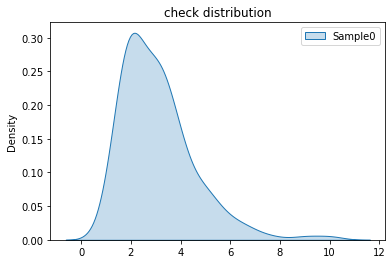

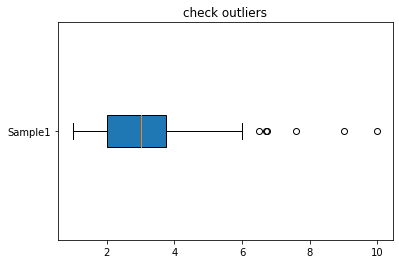

In [ ]:
crosstab=None
Sample1=df[df['sex']=='Male']['tip'].tolist()
Samples=[Sample1]
correlation=False
mu = df['tip'].mean()      # Population mean
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation)

2 Sample Independent t-test
null hypothesis:  means are equal
p-value is:  0.16645623503456755
We can accept the null hypothesis

mean of Samples: [3.09, 2.83]
variance of Samples: [2.2, 1.33]



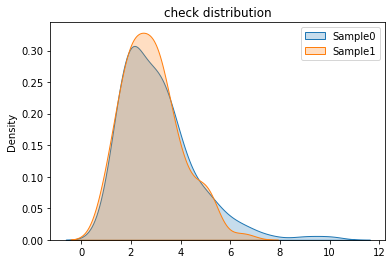

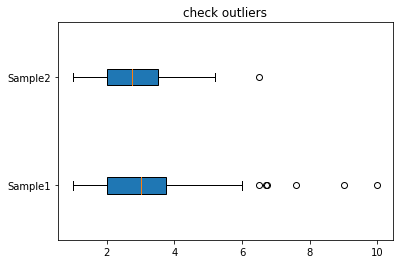


KS test for normality, p_val= 6.496311279509085e-153
Samples are not normally distributed, preform non parametric test.
Levene test for homogeneity, p_val= 0.1595236359896614
Ratio of variance : [2, 1] , not much difference in variances. 

2 Sample Mann-Whitney U test
null hypothesis:  means are equal
p-value is:  0.38335449359363927
We can accept the null hypothesis


In [ ]:
crosstab=None
Sample1=df[df['sex']=='Male']['tip'].tolist()
Sample2=df[df['sex']=='Female']['tip'].tolist()
Samples=[Sample1,Sample2]
correlation=False
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation)

4 Sample Anova f test
null hypothesis:  means are equal
p-value is: 0.1735885553040592
We can accept the null hypothesis

mean of Samples: [2.77, 2.73, 2.99, 3.26]
variance of Samples: [1.51, 0.98, 2.63, 1.5]



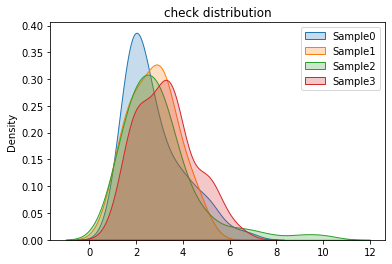

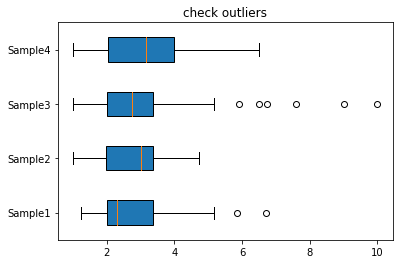


KS test for normality, p_val= 1.3050781119266361e-61
Samples are not normally distributed, preform non parametric test.
Levene test for homogeneity, p_val= 0.6472822314837223
Ratio of variance : [2, 1, 3, 2] , not much difference in variances. 

4 Sample Kruskal-Wallis test
null hypothesis:  means are equal
p-value is: 0.03566056019447427
We can reject the null hypothesis


In [ ]:
crosstab = None
Sample1=df[df['day']=='Thur']['tip'].tolist()
Sample2=df[df['day']=='Fri']['tip'].tolist()
Sample3=df[df['day']=='Sat']['tip'].tolist()
Sample4=df[df['day']=='Sun']['tip'].tolist()
Samples=[Sample1,Sample2,Sample3,Sample4]
correlation=False
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation)

Chi square test for indepedence (crosstab contingency)
null hypothesis:  variables are independet, liklihoods are similar
p-value is: 0.004180302092822261
We can reject the null hypothesis

sex   Male  Female
day               
Thur    30      32
Fri     10       9
Sat     59      28
Sun     58      18



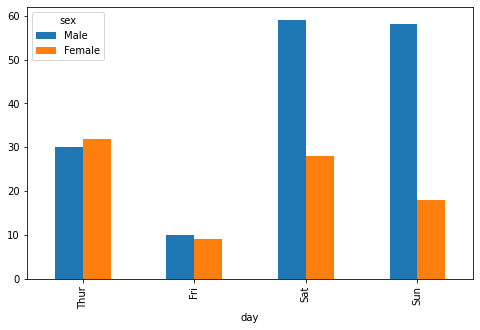

In [ ]:
import pandas as pd
crosstab = pd.crosstab(index=df['day'], columns=df['sex'])   # Sample1 = crosstab.values.tolsit()
Sample1=crosstab.values.tolist()
Samples=[Sample1]
correlation=False
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation)

Chi square test for goodness of fit [[observed],[expected]]
null hypothesis:  observed counts are same as expected, proportions are similar
p-value is: 0.542180861413329
We can accept the null hypothesis



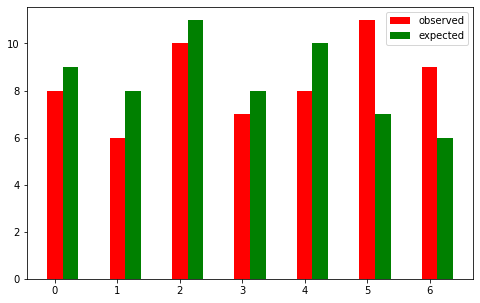

In [ ]:
import pandas as pd
crosstab = None
Sample1=[[8, 6, 10, 7, 8, 11, 9],[9, 8, 11, 8, 10, 7, 6]]         # [[observed],[expected]]
Samples=[Sample1]
correlation=False
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation)

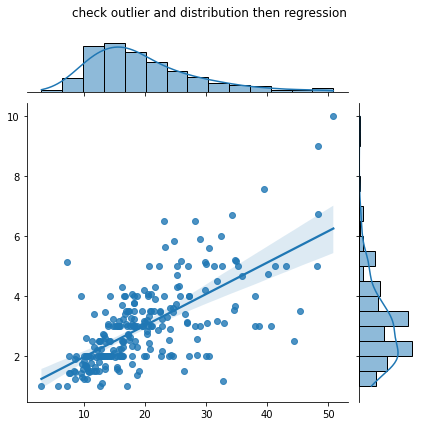


Pearsonr test for linear relationship between variables
null hypothesis:  No liner correlation
corr_stat is:  0.6757341092113647
p-value is:  6.69247064686336e-34
We can reject the null hypothesis
positive correlation (corr_stat>0)
strong correlation (corr_stat>0.07)

Spearmanr test for monotonic relationship between variables
null hypothesis:  No rank-based correlation
corr_stat is:  0.6789681219001009
p-value is:  2.501158440923619e-34
We can reject the null hypothesis
positive correlation (corr_stat>0)
strong correlation (corr_stat>0.07)


In [ ]:
crosstab = None
Sample1=df['total_bill'].to_list()
Sample2=df['tip'].to_list()
Samples=[Sample1, Sample2]         # [Sample1, Sample2] 
correlation=True
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation)

# One code for all Hypothesis testing Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2, f # distributions

from scipy.stats import ttest_ind, ttest_rel, f_oneway, kruskal # numerical vs categorical
from scipy.stats import chisquare, chi2_contingency # categorical features
from scipy.stats import pearsonr, spearmanr # numeric vs numeric

from scipy.stats import kstest # cdf

from statsmodels.distributions.empirical_distribution import ECDF
# Empirical CDF

2 Sample t-test
p-value of independent t-test is:  0.012117171124028792
We can reject the null hypothesis
p-value of the paried t-test is:  0.015402614294268206
We can reject the null hypothesis


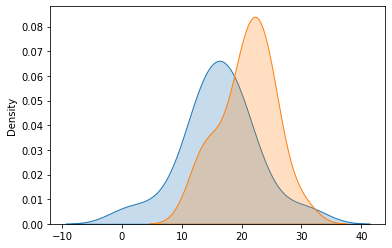

In [ ]:
Mu = 0
Sigma = 18

Sample1 = [12, 18, 12, 13, 15, 1, 7, 20, 21, 25, 19, 31, 21, 17, 17, 15, 19, 15, 12, 15] 
Sample2 = [23, 22, 24, 25, 21, 26, 21, 21, 25, 30, 24, 21, 23, 19, 14, 18, 14, 12, 19, 15] 
Sample3 = [0.0864, 0.2522, 0.0894, 0.2724, 0.0853, 0.1367, 0.853]


Samples = [Sample1, Sample2]

alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'

H0 = 'means are equal'       # Sample1>=Sample2    # Sample1<=Sample2
Ha = 'means are not equal'   # Sample1<Sample2     # Sample1>Sample2
H0_chi_stat = 'obs and exp values are same'
#H0(chi_stat) = 'proportions are similar'
H0_chi2_contingency = 'variables are independet'
#H0(chi2_contingency) = 'liklihoods are similar'


if not all(Samples):
  print('Check Samples detail?')
  exit()

if type(Sample1[0])==list:
  
  if sum(Sample1[0])-sum(Sample1[1])<1:
    print('Chi square test for goodness of fit (obs,exp)')
    from scipy.stats import chisquare  
    test, p_val = chisquare(*Sample1)  
    print("p-value is: " + str(p_val)) 
    if p_val <= alpha:  
        print('We can reject the null hypothesis')  
    else:  
        print('We can accept the null hypothesis') 
      
  else:
    print('Chi square test for indepedence (contingency)')
    from scipy.stats import chi2_contingency  
    test, p_val, dof, expected_val = chi2_contingency(Sample1)  
    print("p-value is: " + str(p_val)) 
    if p_val <= alpha:  
        print('We can reject the null hypothesis')  
    else:  
        print('We can accept the null hypothesis') 
  
elif len(Samples)>2:
  print(len(Samples), 'Sample','Anova f test')
  from scipy.stats import f_oneway  
  f_test, p_val = f_oneway(*Samples)  
  print("p-value is: " + str(p_val))
  if p_val < alpha:      
      print("We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis")  
  
elif len(Samples)>0.001:
  print(len(Samples), 'Sample','t-test')
  from scipy.stats import ttest_ind 
  t_test,p_val = ttest_ind(*Samples)
  print("p-value of independent t-test is: ", p_val)
  if p_val < alpha:      
      print("We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis") 
  from scipy.stats import ttest_rel
  t_test, p_val = ttest_rel(*Samples, alternative=alternative)  
  print("p-value of the paried t-test is: ", p_val)
  # taking the threshold value as 0.05 or 5%  
  if p_val < 0.05:  
      print("We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis") 
    
  
elif len(Samples)==1:
  print('t test')
  from scipy.stats import ttest_1samp			
  t_stat, p_val = ttest_1samp(Sample1, Sigma, alternative=alternative)	
  print("P-value is: ", p_val)  
  if p_val < 0.05:      
      print(" We can reject the null hypothesis")  
  else:  
      print("We can accept the null hypothesis") 
      
import matplotlib.pyplot as plt
import seaborn as sns
if type(Sample1[0])==list:
  for samp in (Sample1): 
    sns.kdeplot(samp,fill=True)
  plt.show()
else:
  for samp in (Samples): 
    sns.kdeplot(samp,fill=True)
  plt.show()

Reference:

https://www.javatpoint.com/hypothesis-testing-python

https://www.youtube.com/watch?v=YrhlQB3mQFI&ab_channel=KrishNaik

https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

fund_05_hypothesis_correlation-checkpoint   (scaler notes)

# Coin example (Chi)

In [ ]:
# alfa and p_value are area of probabity density (total p=1)
# cr_val and stat_value are values on x axis
https://people.richland.edu/james/lecture/m170/tbl-chi.html
https://www.geogebra.org/m/smhy8cxz
# to rejec H0 in chi test
# chi_cri < chi_stat
# OR alfa < p_value

In [ ]:
# A coin is tossed 50 times, and 28 heads were seen
# H0: Coin is fair
# Ha: Coin is biased
chi_stat = (28 - 25)**2/25 + (22 - 25)**2 /25 # chi_stat (observed value), compare it with chi_cri (critical value)
chi_stat

In [ ]:
chi_cr = chi2.ppf(q=0.95, df=1)
chi_cr   # critical chi value at alfa, can also check in Chi table online

In [ ]:
p_value = 1 - chi2.cdf(0.72, df=1) # p_value, compare it with alfa 0.05
p_value

In [ ]:
chi_stat, p_value = chisquare([28, 22],[25, 25])      # no need df, but significance will be 95% 
print(chi_stat, p_value)  # chi_stat & p_value

In [ ]:
# p-value > p-alfa --> fail to reject H0 (coin is fair)

In [ ]:
# A coin is tossed 50 times, and 45 heads were seen
# H0: Coin is fair
# Ha: Coin is biased
chi_stat, p_value = chisquare( [45, 5],[25,25] )       # ([obserbed],[expected])
print(chi_stat, p_value)

In [ ]:
# p-alfa > p-value  --> reject H0 (coin is biased)
# chi_stat > cri_chi --> reject H0 (coin is biased)

# Dice example (Chi)

In [ ]:
chi_stat = (2 - 6)**2/6 + (4 - 6)**2/6 + (8 - 6)**2/6 + (9 - 6)**2/6 + (3 - 6)**2/6 + (10 - 6)**2/6 
chi_stat                        # Must find chi_stat

In [ ]:
chi_cr = chi2.ppf(q=0.95, df=1)
chi_cr                         # Now either find chi_cr

In [ ]:
if chi_cr < chi_stat:
    print("Reject H0")
else:
    print("fail to reject H0")

In [ ]:
p_val = 1 - chi2.cdf(chi_stat, df=5)
p_val                          # OR can find p_val

In [ ]:
if alfa > p_value:
    print("Reject H0")
else:
  print("fail to reject H0")

In [ ]:
alfa=0.1
p_val=chi2.ppf(q=1-alfa, df=5)
chi_stat, p_value = chisquare( [2,4,8,9,3,10],[6,6,6,6,6,6] )
if alfa > p_value:
    print("Reject H0")
else:
  print("fail to reject H0")
if chi_cr < chi_stat:
    print("Reject H0")
else:
    print("fail to reject H0")

# D70-4 (Chi)

In [ ]:
alfa=0.05
A=sum([73,38,18])
chi_stat, p_value = chisquare([73,38,18],[0.6*A,0.28*A,0.12*A])
chi_stat, p_value

In [ ]:
if alfa > p_value:
    print("Reject H0")
else:
  print("fail to reject H0")

In [ ]:
chi_cr = chi2.ppf(q=0.95, df=3-1)
print(chi_cr)
if chi_cr < chi_stat:
    print("Reject H0")
else:
    print("fail to reject H0")

# D70-7 (Chi)

# Online Vs Offline -- Gender (Chi)

In [ ]:
observed = [
    [527, 72],
    [206, 102]
]
chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(chi_stat, p_value)

In [ ]:
print(df)

In [ ]:
print(exp_freq)

 p-value is very small --> Gender affects preference for online vs offline

# iPhone Sales (Anova)

In [ ]:
categories = 3
numbers = 18

DF1 = categories - 1                # divide in msb = ssb/DF1
DF2 = numbers - categories          # divide in msw = ssw/DF2
DF1,DF2


In [ ]:
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

In [ ]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average sales for A: {}'.format(m1))
print('Average sales for B: {}'.format(m2))
print('Average sales for C: {}'.format(m3))

In [ ]:
m = (m1+m2+m3)/3 
print('Overall mean: {}'.format(m)) 

In [ ]:
SSb = 6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

In [ ]:
MSb = SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

In [ ]:
err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)
err = err_a+err_b+err_c
ssw = []
for i in err:
    ssw.append(i**2)
    
SSw = np.sum(ssw)

In [ ]:
MSw = SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

In [ ]:
F = MSb/MSw
print('F-score: {}'.format(F))

In [ ]:
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

In [ ]:
# If assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal(a, b, c)

In [ ]:
cr = f.ppf(0.95, dfn=2, dfd=15)

In [ ]:
cr

In [ ]:
x = df_aerofit["Miles"]
y = df_aerofit["Income"]
df_aerofit.plot.scatter(x="Miles", y="Income")
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = pearsonr(x, y) #stat, p-value; p-value is very small --> reject H0
if p_value < 0.05:
    print("Null hypothesis is rejected")

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_aerofit.corr(method='pearson'), square=True,annot=True, cmap="Blues")

# D70-5 (Anova)

In [ ]:
a=[8,9,11,12]
b=[6,8,10,4]
c=[14,12,18,9]
d=[20,22,25,23]
f_stat, p_value = f_oneway(a,b,c,d) 
print(f_stat, p_value)

In [ ]:
f_cr = f.ppf(0.95, dfn=3, dfd=12)
f_cr

In [ ]:
if f_cr < f_stat:
    print("Reject H0")
else:
  print("fail to reject H0")

# D70-7 (Anova)

In [ ]:
categories = 3
numbers = 14

DF1 = categories - 1                # divide in msb = ssb/DF1
DF2 = numbers - categories          # divide in msw = ssw/DF2
DF1,DF2

In [ ]:
a=[300,400,300,500,0]
b=[600,300,300,400]
c=[700,300,400,600,500]
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

In [ ]:
if 0.05 > p_value:
    print("Reject H0")
else:
  print("fail to reject H0")

In [ ]:
f_cr = f.ppf(0.95, dfn=2, dfd=11)
f_cr

In [ ]:
if f_cr < f_stat:
    print("Reject H0")
else:
  print("fail to reject H0")

# Aerofit (Anova)

In [ ]:
df_aerofit = pd.read_csv("aerofit.csv")

In [ ]:
df_aerofit.head()

In [ ]:
df_aerofit["Product"].unique()

## Income VS product

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [ ]:
a = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
b = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
c = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [ ]:
# H0: all three have same mean
f_oneway(a, b, c)

In [ ]:
# p-value is small -- Reject H0

In [ ]:
kruskal(a, b, c)

In [ ]:
# p-value is small -- Reject H0

In [ ]:
bins = [0, df_aerofit["Income"].median(), df_aerofit["Income"].max()]
labels = ["low", "high"]
df_aerofit["Income_bin"] = pd.cut(df_aerofit["Income"], bins, labels=labels)

In [ ]:
df_aerofit.head()

In [ ]:
income_bin_product = pd.crosstab(index=df_aerofit["Income_bin"], columns=df_aerofit["Product"])
income_bin_product

In [ ]:
# H0: income bin and product are independent
# Ha: dependant
chi2_contingency(income_bin_product) # chistat, p-value, df, expected

In [ ]:
# p-value is small -- we reject H0

## Gender and product

In [ ]:
gender_product = pd.crosstab(index=df_aerofit['Gender'],columns=df_aerofit['Product'])
gender_product

In [ ]:
chi2_contingency(gender_product) # chi_stat, p_value, dof, expected

## Gender and income

In [ ]:
sns.boxplot(x='Gender', y='Income', data=df_aerofit)

In [ ]:
a = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]
b = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [ ]:
# H0: Gender and income are independent (equal mean)
ttest_ind(a, b)

In [ ]:
f_oneway(a, b)

In [ ]:
kruskal(a, b)

In [ ]:
# Gender and Income Bin
gender_income = pd.crosstab(index=df_aerofit["Gender"], columns=df_aerofit["Income_bin"])
gender_income

In [ ]:
# H0: Gender does not affect income
chi2_contingency(gender_income)

In [ ]:
# Statistically significant at 95% confidence
# Reject H0

## Correlations

In [ ]:
df_aerofit.describe()

# Two drug recovery (t-test)

In [ ]:
d1 = pd.read_csv("drug_1_recovery.csv")
d1

In [ ]:
d2 = pd.read_csv("drug_2_recovery.csv")

In [ ]:
len(d1)

In [ ]:
len(d2)

In [ ]:
d1.mean()

In [ ]:
d2.mean()

In [ ]:
# H0: mu1 = mu2 (both drugs are same)
# Ha: mu1 not= mu2
ttest_ind(d1, d2)

p-values is very small --> reject null hypothesis

In [ ]:
# H0: mu1 = mu2 (both drugs are same)
# Ha: mu1 < mu2
ttest_ind(d1, d2, alternative="less") # left tailed

In [ ]:
# H0: mu1 = mu2 (both drugs are same)
# Ha: mu1 > mu2
ttest_ind(d1, d2, alternative="greater") # right tailed

# Sachin (t-test, ks test)

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

In [ ]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Century,Won
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,No,No
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,No,No
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,No,Yes
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,No,Yes
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,No,No


## First Vs Second innings

In [ ]:
df.groupby(["Inns"])["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [ ]:
df_first_innings = df[df["Inns"]==1]
df_second_innings = df[df["Inns"]==2]

In [ ]:
# H0: scoring pattern across these two are the same
ttest_ind(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject: they are the same

Ttest_indResult(statistic=1.4612016295532178, pvalue=0.14483724194759962)

In [ ]:
f_oneway(df_first_innings["runs"], df_second_innings["runs"])

F_onewayResult(statistic=2.1351102022089794, pvalue=0.1448372419476105)

In [ ]:
e1 = ECDF(df_first_innings["runs"])
e2 = ECDF(df_second_innings["runs"])

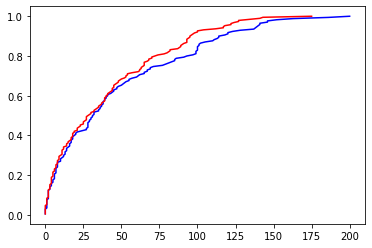

In [ ]:
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

In [ ]:
# H0: two samples come from same distribution
kstest(df_first_innings["runs"], df_second_innings["runs"])

In [ ]:
# p-value is high
# Stick with the null hypothesis

## Won Vs Lost

In [ ]:
df.groupby(["Won"])["runs"].mean()

In [ ]:
df_won = df[df["Won"]==True]
df_lost = df[df["Won"]==False]

In [ ]:
# H0: same scoring pattern
# Ha: different scoring pattern (2-tailed)
ttest_ind(df_won["runs"], df_lost["runs"])

In [ ]:
f_oneway(df_won["runs"], df_lost["runs"])

In [ ]:
# H0: same scoring pattern
# Ha: better scoring in matches won
ttest_ind(df_won["runs"], df_lost["runs"], alternative="greater")

In [ ]:
# H0: same scoring pattern
# Ha: worse scoring in matches won
ttest_ind(df_won["runs"], df_lost["runs"], alternative="less")

In [ ]:
e1 = ECDF(df_won["runs"])
e2 = ECDF(df_lost["runs"])

In [ ]:
plt.plot(e1.x, e1.y, c="r")
plt.plot(e2.x, e2.y, c="b")

In [ ]:
# Is the gap in the cdf statistically significant or not

In [ ]:
# H0: two cdfs are same
# Ha: two cdfs are different
kstest(df_won["runs"], df_lost["runs"])

In [ ]:
#p-value is small, so we go with the alternate

## Century Vs no century

In [ ]:
df.groupby(["century"])["runs"].mean()

In [ ]:
df_century = df[df["century"]==True]
df_no_century = df[df["century"]==False]

In [ ]:
ttest_ind(df_century["runs"], df_no_century["runs"])

In [ ]:
e1 = ECDF(df_century["runs"])
e2 = ECDF(df_no_century["runs"])

In [ ]:
plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)

In [ ]:
kstest(df_century["runs"], df_no_century["runs"])

## Out of form

In [ ]:
df.head()

In [ ]:
df["year"] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df.head()

In [ ]:
df["runs"].mean()

In [ ]:
df.groupby(["year"]).agg({"runs":[np.mean, "count"]})

In [ ]:
# Out of form
for year in df["year"].unique():
    df_year = df[df["year"]==year]
    df_other_years = df[df["year"]!=year]
    t_stat, p_value = ttest_ind(df_year["runs"], df_other_years["runs"], alternative="less")
    if p_value < 0.05:
        print("Sachin was out of form in ", year)

In [ ]:
# Best years
for year in df["year"].unique():
    df_year = df[df["year"]==year]
    df_other_years = df[df["year"]!=year]
    t_stat, p_value = ttest_ind(df_year["runs"], df_other_years["runs"], alternative="greater")
    if p_value < 0.05:
        print("Sachin was in best form in ", year)

## Century Vs win

In [ ]:
df_won_and_century = pd.crosstab(df["Won"], df["century"])
df_won_and_century

In [ ]:
chi2_contingency(df_won_and_century)

In [ ]:
# At 95% confidence, it is not statistically significant
# At 90% confidence, it is statistically significant

## Correlations

In [ ]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Century,Won
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,No,No
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,No,No
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,No,Yes
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,No,Yes
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,No,No


In [ ]:
numeric_colums = ["runs", "bf", "fours", "sixes", "sr", "year"]

In [ ]:
df_numeric = df[numeric_colums]

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_numeric.corr(method='pearson'), square=True, annot=True, cmap="Blues")

1.2046739457229747e-188
Reject null hypothesis


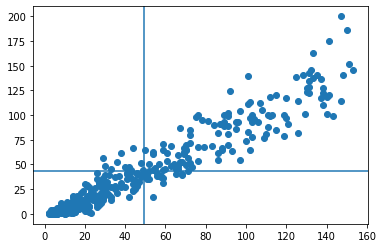

In [ ]:
x = df["bf"]
y = df["runs"]
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = pearsonr(x, y)
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")

0.9630157348326716
Uncorrelated


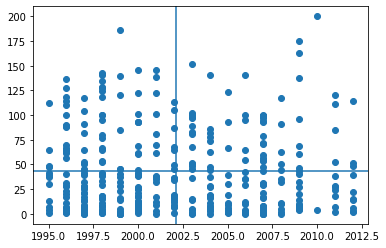

In [ ]:
x = df["year"]
y = df["runs"]
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = pearsonr(x, y)
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")

In [ ]:
sns.pairplot(df_numeric)

# Youtube 2-ads example (t-test)

In [ ]:
youtube_data = pd.read_csv("youtube.csv")
youtube_data.sample(100)

In [ ]:
youtube_data.shape

In [ ]:
youtube_data['customer_segmnt'].value_counts()

In [ ]:
youtube_data.describe()

In [ ]:
youtube_data["watch_time_hrs"].quantile(0.998)

In [ ]:
# Outlier
q998 = youtube_data["watch_time_hrs"].quantile(0.998)
youtube_data_no_out = youtube_data[youtube_data["watch_time_hrs"] < q998]

In [ ]:
youtube_data_no_out.shape

In [ ]:
youtube_data_no_out.describe()

In [ ]:
sns.histplot(youtube_data_no_out['watch_time_hrs'], bins=100)
plt.show()

In [ ]:
control_data = youtube_data_no_out[youtube_data_no_out["customer_segmnt"] == "control"]
treatment_data = youtube_data_no_out[youtube_data_no_out["customer_segmnt"] == "treatment"]

In [ ]:
control_data.shape

In [ ]:
treatment_data.shape

In [ ]:
control_data["watch_time_hrs"].mean()

In [ ]:
treatment_data["watch_time_hrs"].mean()

In [ ]:
ttest_ind(control_data["watch_time_hrs"], treatment_data["watch_time_hrs"])

In [ ]:
#1
ttest_ind(control_data["watch_time_hrs"], treatment_data["watch_time_hrs"], alternative="greater")

In [ ]:
#2
ttest_ind(control_data["watch_time_hrs"], treatment_data["watch_time_hrs"], alternative="less")

# Will Problem solving improve marks? (t-test)

In [ ]:
df_ps = pd.read_csv("problem_solving.csv")
# test1 was before the session, test2 was after

In [ ]:
df_ps

In [ ]:
df_ps.describe()

In [ ]:
# paired t-test
# H0: no difference 

# Ha: 2-sided, 
# left-tailed, 
# right-tailed

In [ ]:
ttest_rel(df_ps["test_1"], df_ps["test_2"])

In [ ]:
#1
ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative="greater")

In [ ]:
#2
ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative="less")

# Visual samples

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

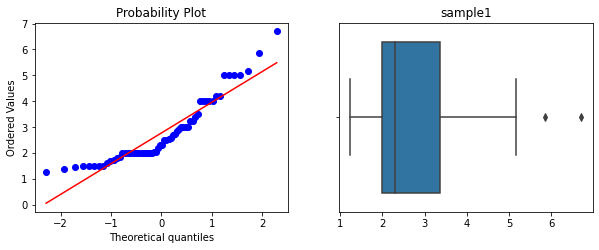

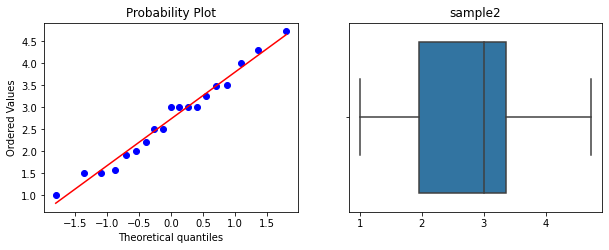

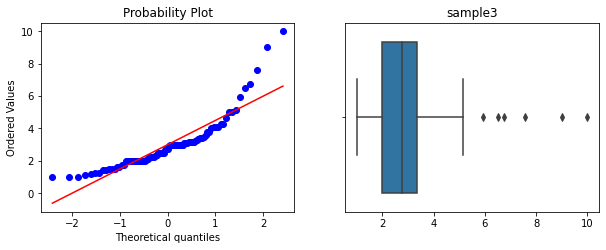

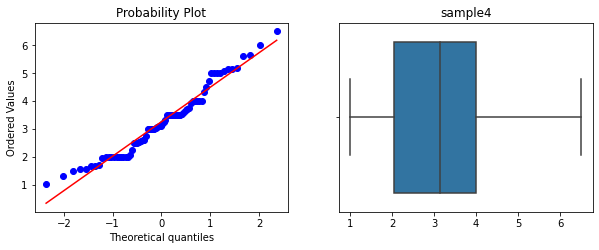

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')

Sample1=df[df['day']=='Thur']['tip'].tolist()
Sample2=df[df['day']=='Fri']['tip'].tolist()
Sample3=df[df['day']=='Sat']['tip'].tolist()
Sample4=df[df['day']=='Sun']['tip'].tolist()
Samples=[Sample1,Sample2,Sample3,Sample4]

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(len(Samples)):
  plt.figure(figsize = [10,16])
  for j in range (2):
    if j==0:
      plt.subplot(len(Samples), 2, 1)
      stats.probplot(Samples[i], dist="norm", plot=plt)
    if j==1:
      plt.subplot(len(Samples), 2, 2)
      sns.boxplot(Samples[i],data=df)
      plt.title('sample'+str(i+1))
plt.show()

null hypothesis:  Samples are not correlated
p-value is:  6.69247064686336e-34
We can reject the null hypothesis


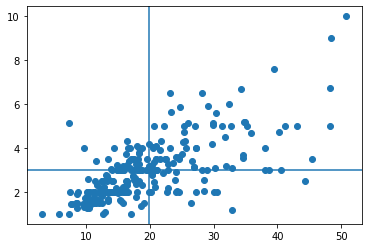

In [ ]:

import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr # numeric vs numeric
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
H0 = 'Samples are not correlated'
print('null hypothesis: ',H0)
corr_stat, p_val = pearsonr(x, y)
print("p-value is: ", p_val)
if p_val <= alpha:  
    print('We can reject the null hypothesis')  
else:  
    print('We can accept the null hypothesis')

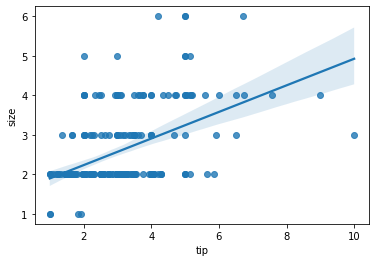

Pearsonr test for linear relationship
null hypothesis:  No liner correlation between variables
corr_stat is:  0.4892987752303571
p-value is:  4.300543327225161e-16
We can reject the null hypothesis
positive correlation between the two variables (corr_stat>0)
strong correlation between the two variables (corr_stat>0.07)

Spearmanr test for monotonic relationship
null hypothesis:  No rank-based correlation between variables
corr_stat is:  0.46826792926211475
p-value is:  1.059850307726077e-14
We can reject the null hypothesis
positive correlation between the two variables (corr_stat>0)
strong correlation between the two variables (corr_stat>0.07)




In [ ]:
crosstab=[]
import seaborn as sb
# load data
df = sb.load_dataset('tips')
Sample1=df['tip']
Sample2=df['size']
Samples=[Sample1,Sample2]
correlation=[Sample1,Sample2]
mu = None
alpha = 0.05 
alternative = 'two-sided'  # 'less' , 'greater'
Hypothesis_testing(Samples,alpha,alternative,mu,crosstab,correlation)

<AxesSubplot:xlabel='total_bill', ylabel='size'>

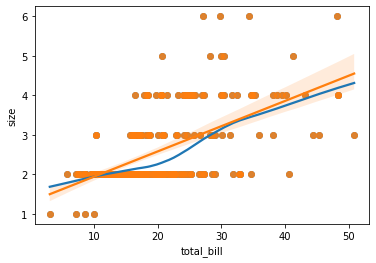

In [ ]:

# importing libraries
import seaborn as sb
  
# load data
df = sb.load_dataset('tips')
Sample1=df['total_bill']
Sample2=df['size']
Samples=[Sample1,Sample2]
correlation=[Sample1,Sample2]
  
# use regplot
sb.regplot(correlation[0],correlation[1], lowess=True)  # for monotonic (spearman corr)
sb.regplot(correlation[0],correlation[1])               # for linear (pearson corr)



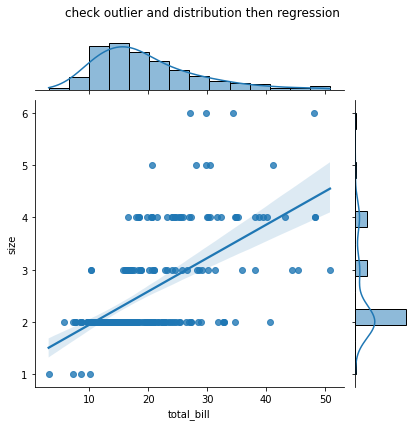

In [ ]:
# importing libraries
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# load data
df = sb.load_dataset('tips')
Sample1=df['total_bill']
Sample2=df['size']
Samples=[Sample1,Sample2]
correlation=[Sample1,Sample2]
  
# use regplot

reg=sb.jointplot(correlation[0],correlation[1],kind='reg')
reg.fig.subplots_adjust(top=.9)
reg.fig.suptitle('check outlier and distribution then regression')
plt.show()
